In [1]:
!pip install -U scipy

Requirement already up-to-date: scipy in /Users/viren/anaconda3/lib/python3.6/site-packages
Requirement already up-to-date: numpy>=1.13.3 in /Users/viren/anaconda3/lib/python3.6/site-packages (from scipy)
You are using pip version 9.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import pearsonr, spearmanr

In [2]:
airbnb_data = pd.read_csv("datasets/airbnb_data_cleaned.csv")

airbnb_data.head(5)

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
3,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
4,7322,Manhattan,Murray Hill,Entire home/apt,200,3,74,0.59,1,129


In [4]:
airbnb_data["price"].corr(airbnb_data["number_of_reviews"])

-0.03593814824481334

In [8]:
numeric_columns = airbnb_data[["price", "minimum_nights",
                               "number_of_reviews", "reviews_per_month",
                               "calculated_host_listings_count",
                               "availability_365"]]

In [9]:
numeric_columns.corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.025506,-0.035938,-0.030608,0.052903,0.078234
minimum_nights,0.025506,1.000000,-0.069368,-0.121702,0.073479,0.101686
number_of_reviews,-0.035938,-0.069368,1.000000,0.549868,-0.059784,0.193557
reviews_per_month,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.052903,0.073479,-0.059784,-0.009421,1.000000,0.182911
availability_365,0.078234,0.101686,0.193557,0.185791,0.182911,1.000000


In [10]:
numeric_columns.cov()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,38787.578687,87.328111,-341.056455,-10.130007,273.975798,1995.978331
minimum_nights,87.328111,302.230699,-58.110088,-3.555423,33.590491,229.005221
number_of_reviews,-341.056455,-58.110088,2321.926596,44.525195,-75.752376,1208.226574
reviews_per_month,-10.130007,-3.555423,44.525195,2.823885,-0.416306,40.444939
calculated_host_listings_count,273.975798,33.590491,-75.752376,-0.416306,691.462011,623.074536
availability_365,1995.978331,229.005221,1208.226574,40.444939,623.074536,16781.553583


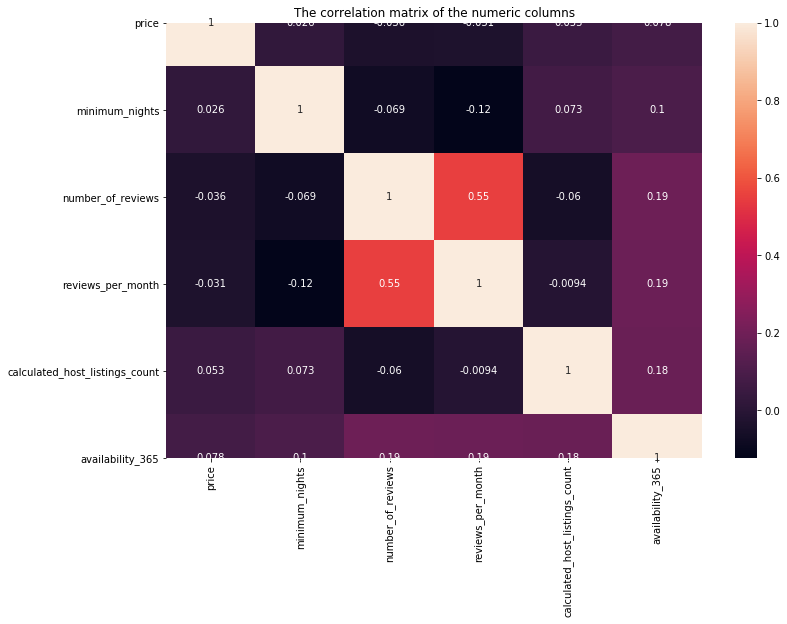

In [12]:
plt.figure(figsize = (12, 8))

sns.heatmap(numeric_columns.corr(), annot = True)

plt.title("The correlation matrix of the numeric columns", y = 1.2)

plt.show()

In [13]:
!pip install -U yellowbrick

     |████████████████████████████████| 263 kB 2.5 MB/s eta 0:00:01


In [14]:
target = numeric_columns["price"]

features = numeric_columns.drop(["price"], axis = 1)

In [15]:
from yellowbrick.target import FeatureCorrelation

feature_names = features.columns

/Users/jananiravi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


/Users/jananiravi/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


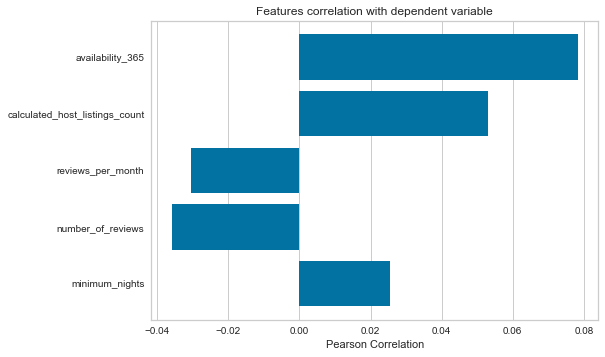

In [16]:
visualizer = FeatureCorrelation(labels = feature_names)

visualizer.fit(features, target)

visualizer.poof()